Employees who stayed: 1233 (83.88%)
Employees who left: 237 (16.12%)


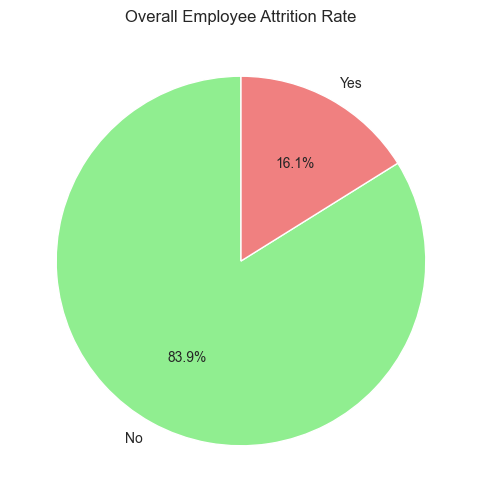

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv') 

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

attrition_count = df['Attrition'].value_counts()
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100

print(f"Employees who stayed: {attrition_count['No']} ({attrition_rate['No']:.2f}%)")
print(f"Employees who left: {attrition_count['Yes']} ({attrition_rate['Yes']:.2f}%)")

# Plot
plt.figure(figsize=(6,6))
plt.pie(attrition_count, labels=attrition_count.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Overall Employee Attrition Rate')
plt.show()

In [7]:
def plot_attrition_by_category(category, title):
    plt.figure(figsize=(10, 6))
    
    attrition_pct = (df.groupby(category)['Attrition']
                     .value_counts(normalize=True)
                     .mul(100)
                     .rename('Percentage')
                     .reset_index()
                     .query('Attrition == "Yes"'))
    
    ax = sns.barplot(x=category, y='Percentage', data=attrition_pct, palette='viridis',hue="df['Department']")
    plt.title(f'Attrition Rate by {title}')
    plt.ylabel('Attrition Rate (%)')
    plt.axhline(y=attrition_rate['Yes'], color='red', linestyle='--', label=f'Overall Rate ({attrition_rate["Yes"]:.1f}%)')
    plt.legend()
    plt.xticks(rotation=45)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.tight_layout()
    plt.show()

demographic_factors = ['Department', 'JobRole', 'Gender', 'EducationField', 'MaritalStatus']
for factor in demographic_factors:
    plot_attrition_by_category(factor, factor)

df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '55+'])
plot_attrition_by_category('AgeGroup', 'Age Group')


ValueError: Could not interpret value `df['Department']` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

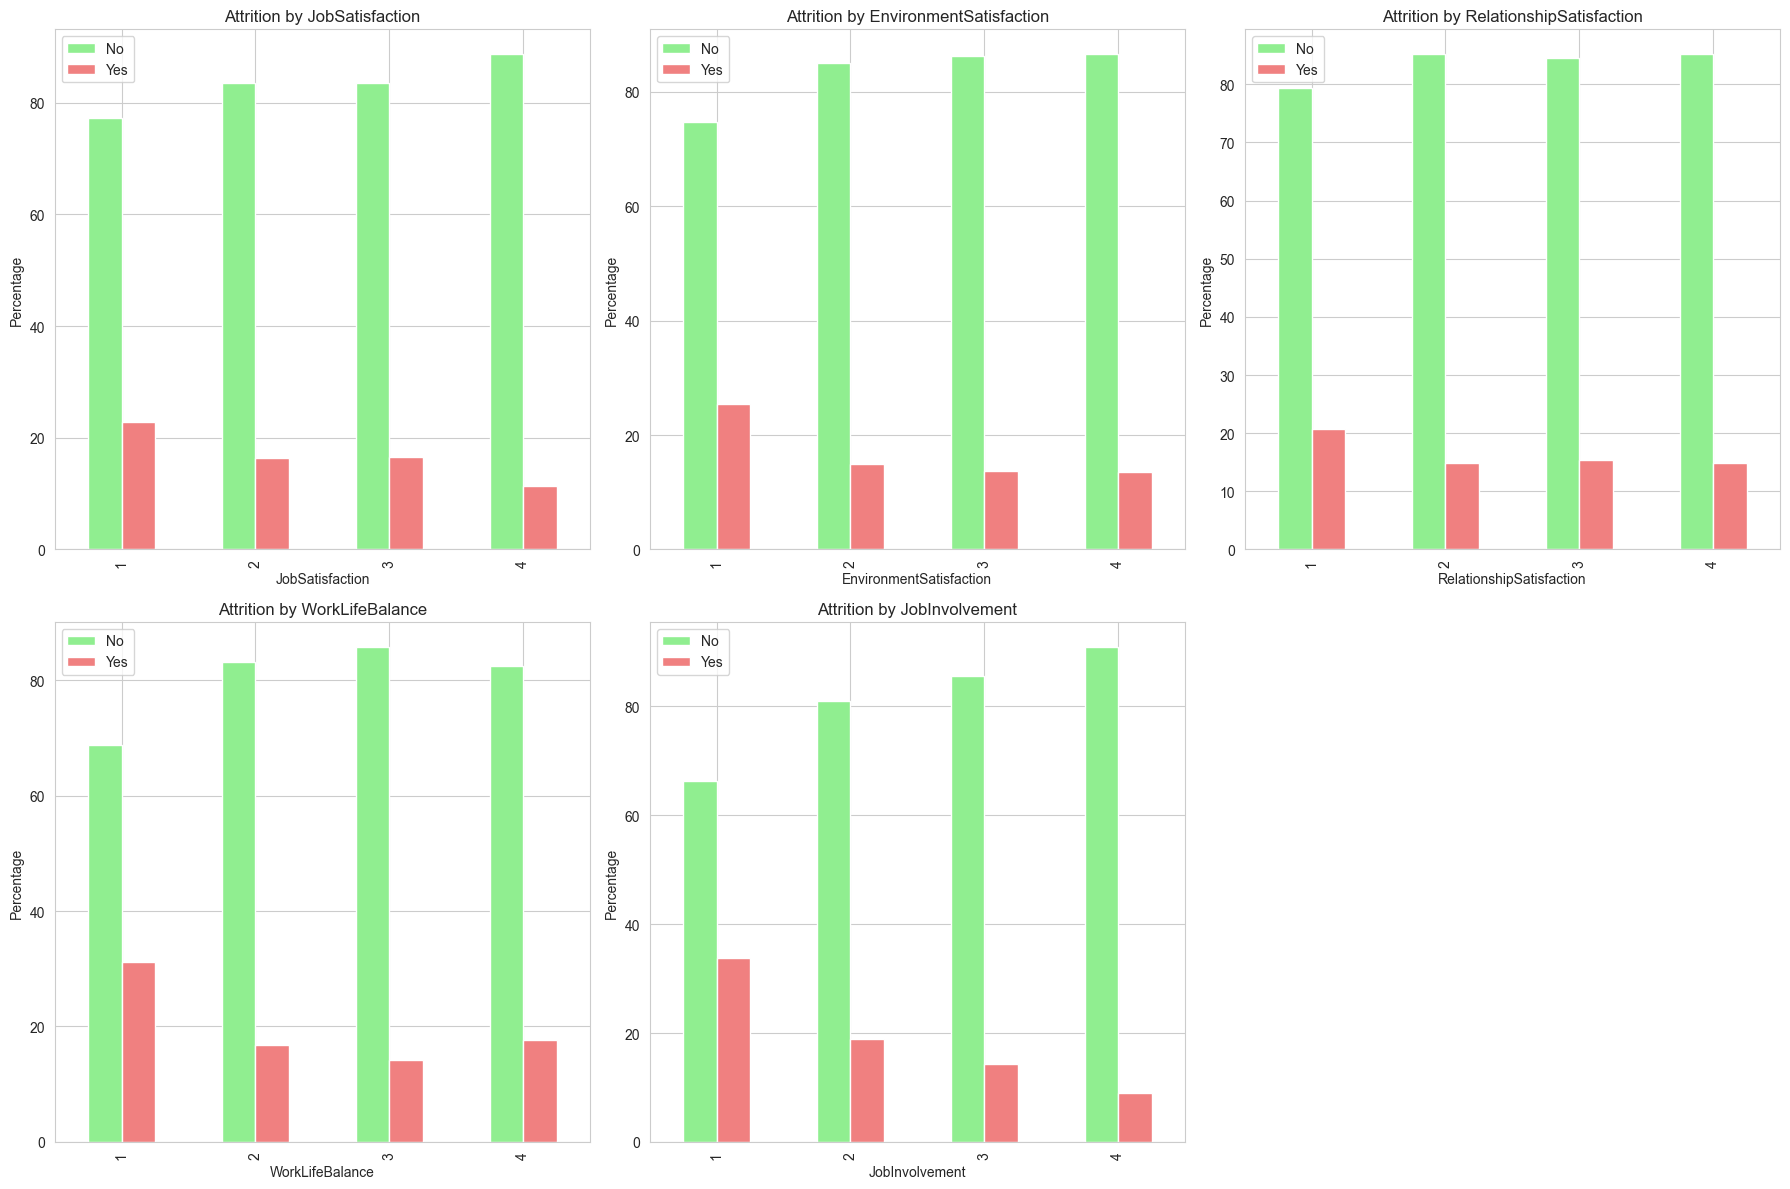

Average Satisfaction Scores by Attrition Status:


,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,JobInvolvement
Attrition,,,,,
No,2.778589,2.771290,2.733982,2.781022,2.770479
Yes,2.468354,2.464135,2.599156,2.658228,2.518987


In [3]:
satisfaction_metrics = ['JobSatisfaction', 'EnvironmentSatisfaction', 
                       'RelationshipSatisfaction', 'WorkLifeBalance', 'JobInvolvement']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, metric in enumerate(satisfaction_metrics):
    ct = pd.crosstab(df[metric], df['Attrition'], normalize='index') * 100
    
    ct.plot(kind='bar', ax=axes[i], color=['lightgreen', 'lightcoral'])
    axes[i].set_title(f'Attrition by {metric}')
    axes[i].set_ylabel('Percentage')
    axes[i].legend(['No', 'Yes'])
    axes[i].set_xlabel(metric)

axes[-1].set_visible(False)
plt.tight_layout()
plt.show()

# Statistical summary
print("Average Satisfaction Scores by Attrition Status:")
df.groupby('Attrition')[satisfaction_metrics].mean()

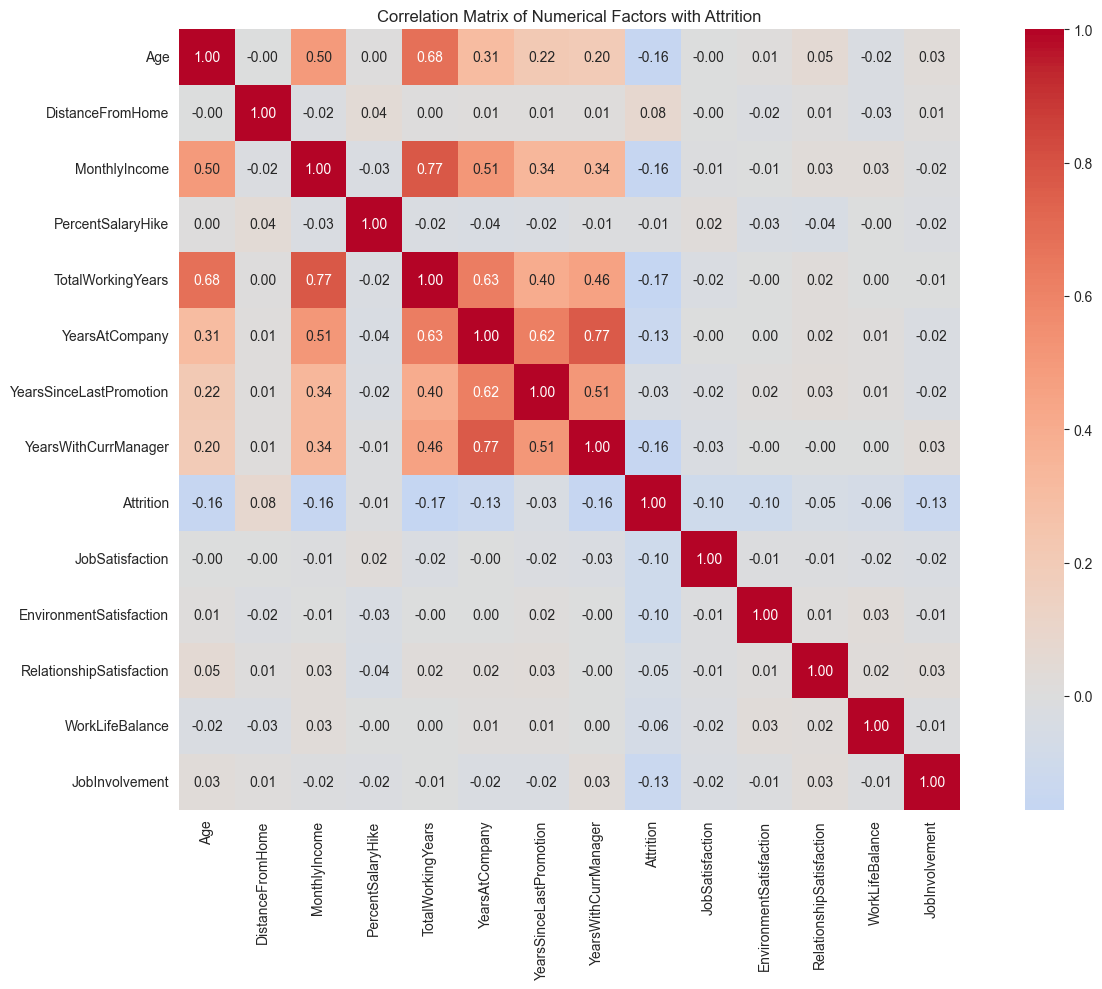

Correlation with Attrition:
Attrition                   1.000000
TotalWorkingYears          -0.171063
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
DistanceFromHome            0.077924
WorkLifeBalance            -0.063939
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
PercentSalaryHike          -0.013478
Name: Attrition, dtype: float64


In [4]:
from sklearn.preprocessing import LabelEncoder

df_corr = df.copy()

# Encode Attrition (Yes=1, No=0)
le = LabelEncoder()
df_corr['Attrition'] = le.fit_transform(df['Attrition'])

df_corr['OverTime'] = le.fit_transform(df['OverTime'])
df_corr['Gender'] = le.fit_transform(df['Gender'])

numerical_features = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'PercentSalaryHike',
                     'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion',
                     'YearsWithCurrManager', 'Attrition'] + satisfaction_metrics

corr_matrix = df_corr[numerical_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True)
plt.title('Correlation Matrix of Numerical Factors with Attrition')
plt.tight_layout()
plt.show()

# Show correlations with Attrition specifically
print("Correlation with Attrition:")
attrition_corr = corr_matrix['Attrition'].sort_values(key=abs, ascending=False)
print(attrition_corr)

<Figure size 800x600 with 0 Axes>

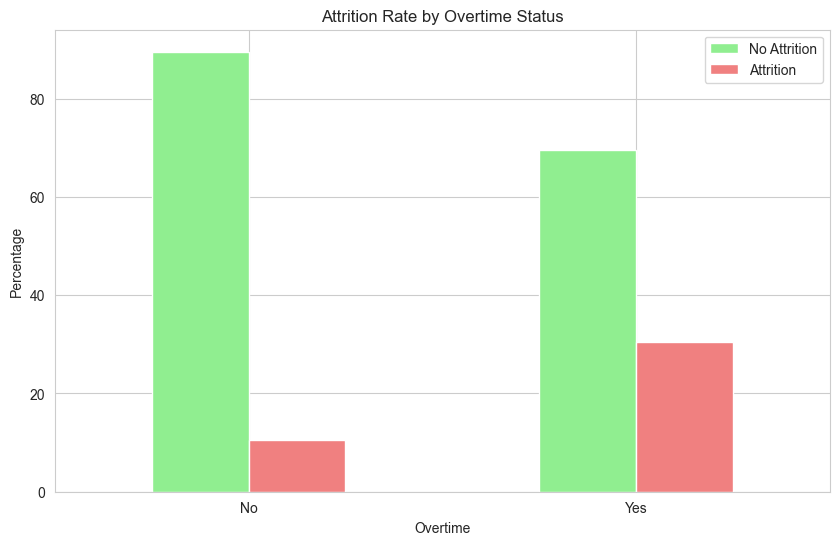

Attrition Rate by Overtime:
Attrition         No        Yes
OverTime                       
No         89.563567  10.436433
Yes        69.471154  30.528846


In [5]:
# Overtime analysis
plt.figure(figsize=(8, 6))
overtime_ct = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
overtime_ct.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Attrition Rate by Overtime Status')
plt.ylabel('Percentage')
plt.xlabel('Overtime')
plt.legend(['No Attrition', 'Attrition'])
plt.xticks(rotation=0)
plt.show()

print("Attrition Rate by Overtime:")
print(overtime_ct)